In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv("dataset/data_playlist.csv")

### Features del dataframe

- **acousticness**: Número [float]  
  Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. Un valor de 1.0 representa alta confianza en que la pista es acústica.  
  **Rango**: 0 - 1

- **danceability**: Número [float]  
  La bailabilidad describe cuán adecuada es una pista para bailar, basada en una combinación de elementos musicales, incluyendo el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0.0 es lo menos bailable y 1.0 es lo más bailable.

- **duration_ms**: Entero [integer]  
  La duración de la pista en milisegundos.

- **energy**: Número [float]  
  La energía es una medida de 0.0 a 1.0 que representa una medida perceptual de intensidad y actividad. Generalmente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Las características perceptuales que contribuyen a este atributo incluyen el rango dinámico, la sonoridad percibida, el timbre, la frecuencia de inicio y la entropía general.

- **instrumentalness**: Número [float]  
  Predice si una pista no contiene voces. Los sonidos como "Ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.

- **key**: Entero [integer]  
  La clave en la que se encuentra la pista. Los enteros se asignan a tonos utilizando la notación estándar de clase de tono. 0 = C (Do), 1 = C♯/D♭ (Do sostenido/Re bemol), 2 = D (Re), 3 = D♯/E♭ (Re sostenido/Mi bemol), 4 = E (Mi), 5 = F (Fa), 6 = F♯/G♭ (Fa sostenido/Sol bemol), 7 = G (Sol), 8 = G♯/A♭ (Sol sostenido/La bemol), 9 = A (La), 10 = A♯/B♭ (La sostenido/Si bemol), 11 = B (Si). -1 indica que no se detectó una clave.  
  **Rango**: -1 - 11

- **liveness**: Número [float]  
  Detecta la presencia de una audiencia en la grabación. Los valores altos de vivacidad representan una mayor probabilidad de que la pista haya sido interpretada en vivo. Un valor superior a 0.8 indica una alta probabilidad de que la pista sea en vivo.

- **loudness**: Número [float]  
  La sonoridad total de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa entre pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores típicamente oscilan entre -60 y 0 dB.

- **mode**: Entero [integer]  
  Indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor por 0.

- **speechiness**: Número [float]  
  La cualidad de habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida al habla sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente están compuestas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o superpuestas, como en el caso del rap. Los valores por debajo de 0.33 representan probablemente música y otras pistas no parecidas al habla.

- **tempo**: Número [float]  
  El tempo general estimado de una pista en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del pulso.

- **time_signature**: Entero [integer]  
  Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional que especifica cuántos tiempos hay en cada compás. La firma de tiempo varía de 3 a 7, indicando firmas de tiempo de "3/4" a "7/4". 3 representa un compás de 3/4 (valses y baladas), 4 es 4/4 (el más común en pop y rock), 5 es 5/4 (jazz y experimental), 6 es 6/4 o 6/8 (baladas y piezas clásicas) y 7 es 7/4 (progresivo y complejo).   
  **Rango**: 3 - 7 (El nuestro va de 1 a 5)

- **valence**: Número [float]  
  Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

- **label**: Entero [integer]  
  Indica si una canción es del gusto de la persona que escucha esta playlist. Un valor de **1** significa que la canción le gusta a la persona, mientras que un valor de **0** indica que no le gusta.


In [4]:
df.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [2]:
# Muestra los valores mínimos y máximos de cada columna en el DataFrame

min_max_values = df.agg(['min', 'max'])
print(min_max_values)

     acousticness  danceability  duration   energy  instrumentalness  key  \
min      0.000001         0.107     33840  0.00925             0.000    0   
max      0.994000         0.986    675360  0.99500             0.967   11   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
min     0.024   -29.601     0       0.0234   55.747               1   0.0332   
max     0.979    -0.533     1       0.7210  204.162               5   0.9750   

     label  
min      0  
max      1  


In [3]:
# descripción de cada columna e información general del dataframe

df.info()

#El dataframe esta completo sin valores vacios, ni valores NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


In [15]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [12]:
#descripcion estadistica general

df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [13]:
# Creacion de un indice para identificar las observaciones

df.index = range(1, len(df) + 1)
df.index.name = 'song'

### Graficos

Se identifican los siguientes fetures posibles a ser graficados:
Distrbucion: 
key: Claves en la que se encuntra cada pista (cantidades)

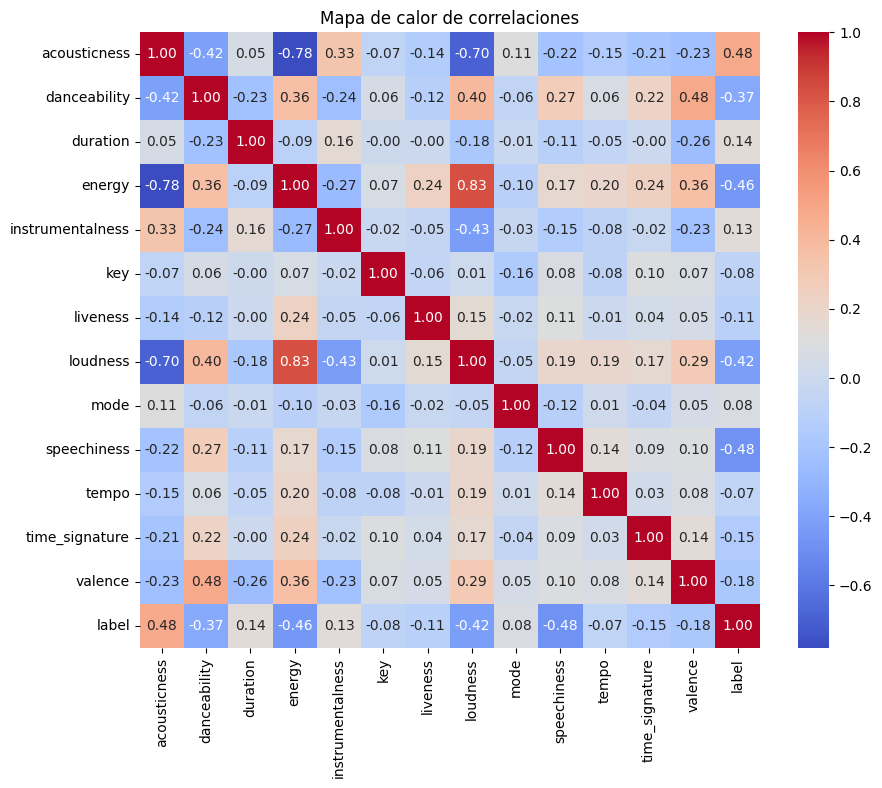

In [44]:
# Ajustar el tamaño de la figura y calcular la correlación entre las columnas
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt = ".2f")
plt.title("Mapa de calor de correlaciones")
#plt.savefig('heatmap_correlaciones.png')
plt.show()

### Conclusiones al ver el grafico de correlaciones

#### Correlaciones Negativas Fuertes
- **acousticness y energy (-0.78)**: Las canciones con alta *acousticness* tienden a tener menos *energy*, lo cual es típico en música acústica, que suele ser más suave e intensa.
- **energy y acousticness (-0.78)**: La música enérgica es menos acústica, frecuentemente más orientada hacia producciones electrónicas o de alta intensidad.

#### Correlaciones Positivas Fuertes
- **energy y loudness (0.83)**: La energía de una canción está fuertemente relacionada con su volumen, dado que ambos atributos contribuyen a la percepción de intensidad.
- **loudness y energy (0.83)**: Similarmente, canciones con alto volumen suelen ser enérgicas.

#### Correlaciones Negativas Moderadas
- **acousticness y loudness (-0.70)**: Las canciones acústicas tienden a ser menos fuertes en volumen, acorde a la naturaleza de este estilo.
- **acousticness y danceability (-0.42)**: Las canciones acústicas tienden a ser menos bailables, ya que suelen carecer de ritmos repetitivos y marcados.
- **danceability y acousticness (-0.42)**: La música bailable es menos acústica, frecuentemente con una mayor presencia de elementos electrónicos.
  
#### Correlaciones Positivas Moderadas
- **danceability y valence (0.48)**: Las canciones bailables suelen tener un tono positivo, típico en géneros como pop y dance.
- **valence y danceability (0.48)**: La positividad en una canción está asociada con su bailabilidad.
- **danceability con loudness (0.40) y energy (0.36)**: Canciones con ritmo bailable tienden a ser más fuertes y enérgicas.
- **energy y valence (0.36)**: Las canciones enérgicas suenan más positivas, un patrón común en géneros de alta energía.

#### Correlaciones Bajas
- **instrumentalness y acousticness (0.33)**: Las canciones instrumentales suelen ser ligeramente más acústicas.
- **loudness y valence (0.29)**: Canciones fuertes tienden a sonar más positivas.
- **speechiness y danceability (0.27)**: La presencia de palabras habladas está débilmente asociada con la bailabilidad.

#### Correlaciones Muy Bajas o Sin Correlación
- **duration, key, liveness, mode, speechiness, tempo y time_signature**: Estas características muestran correlaciones muy bajas con otras variables, indicando que son más independientes y no afectan significativamente atributos como la energía, la bailabilidad o el volumen de la música.


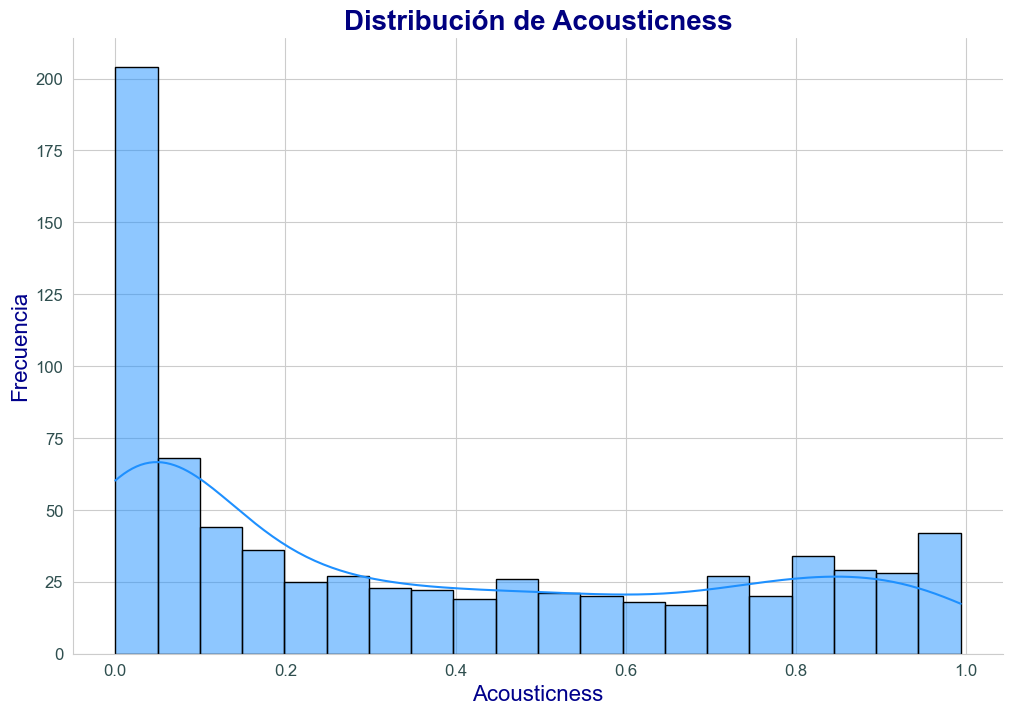

In [45]:
sns.set_style("whitegrid")

# Crear la figura y ajustar tamaño
plt.figure(figsize=(12, 8))

# Histograma estilizado
sns.histplot(df['acousticness'], bins=20, kde=True, color="dodgerblue", edgecolor="black")

# Agregar título y etiquetas con estilo mejorado
plt.title('Distribución de Acousticness', fontsize=20, weight='bold', color="navy")
plt.xlabel('Acousticness', fontsize=16, color="darkblue")
plt.ylabel('Frecuencia', fontsize=16, color="darkblue")

# Personalizar el diseño del eje y etiquetas
plt.xticks(fontsize=12, color="darkslategray")
plt.yticks(fontsize=12, color="darkslategray")

# Eliminar los bordes superiores y derechos para un aspecto más limpio
sns.despine(top=True, right=True)

# Mostrar el gráfico
plt.show()

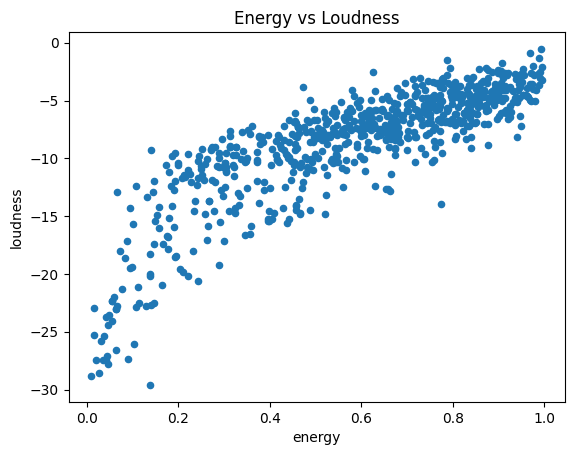

In [31]:
df.plot(kind='scatter', x='energy', y='loudness', title='Energy vs Loudness')
plt.show()

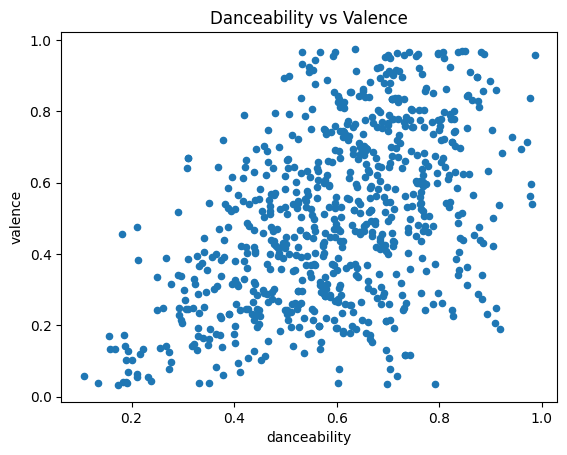

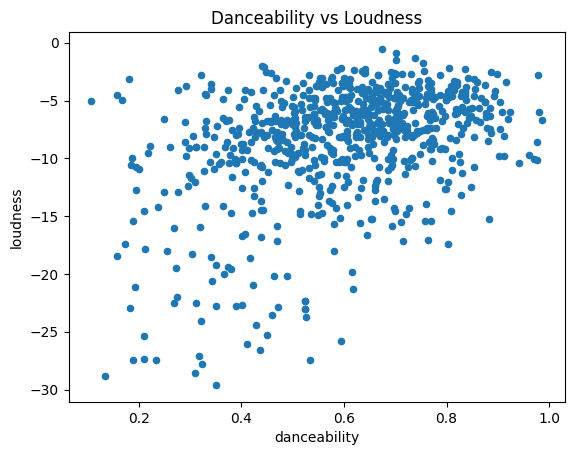

In [32]:
df.plot(kind='scatter', x='danceability', y='valence', title='Danceability vs Valence')
plt.show()
df.plot(kind='scatter', x='danceability', y='loudness', title='Danceability vs Loudness')
plt.show()

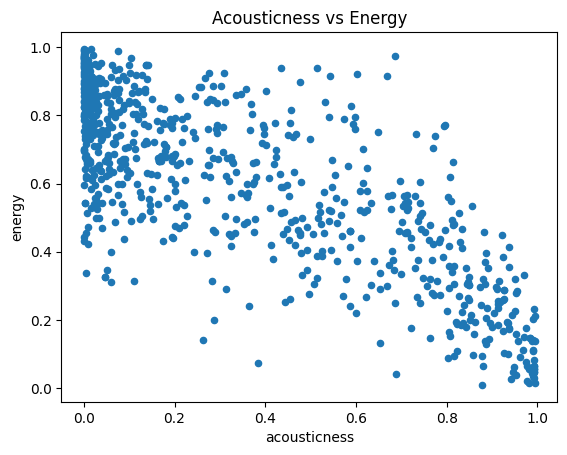

In [33]:
df.plot(kind='scatter', x='acousticness', y='energy', title='Acousticness vs Energy')
plt.show()

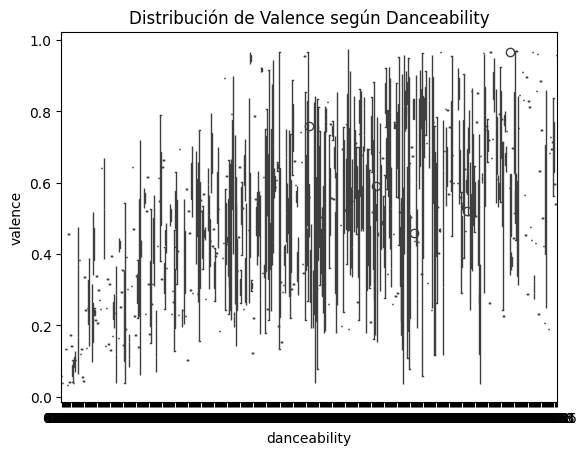

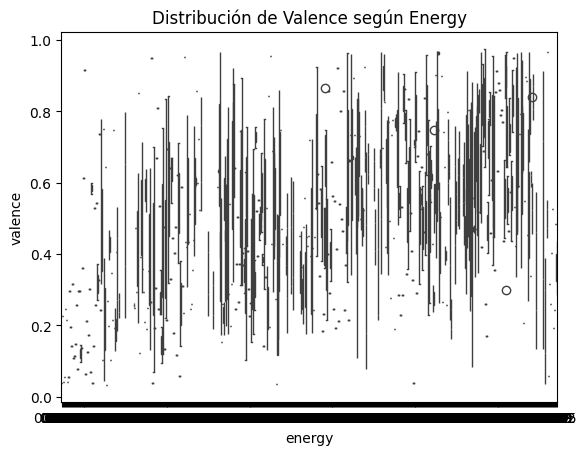

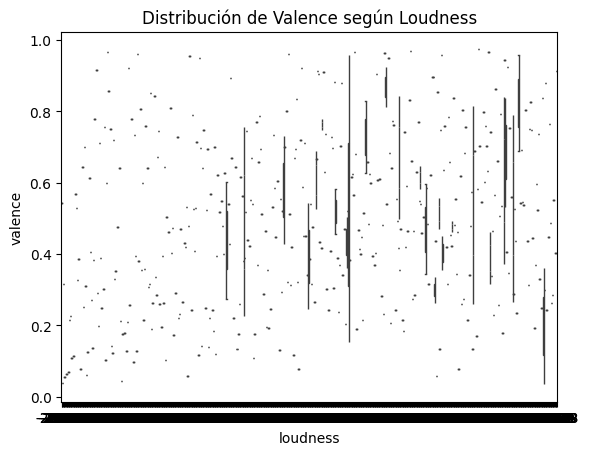

In [34]:
import seaborn as sns
sns.boxplot(x='danceability', y='valence', data=df)
plt.title("Distribución de Valence según Danceability")
plt.show()

sns.boxplot(x='energy', y='valence', data=df)
plt.title("Distribución de Valence según Energy")
plt.show()

sns.boxplot(x='loudness', y='valence', data=df)
plt.title("Distribución de Valence según Loudness")
plt.show()

In [ ]:
clasificar en 2 los gustos 

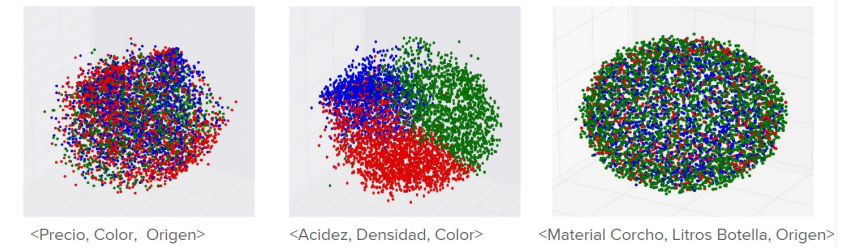